In [39]:
import matplotlib.pyplot as plt

In [30]:
def count_calls(counter):
    def decorator(func):
        def wrapper(*args):
            params = f"{args}"
            counter[params] = 1 if params not in counter else counter[params]+1
            return func(*args)
        return wrapper
    return decorator

In [3]:
def get_total(counts):
    total= 0
    for key,value in counts.items():
        total+=value
    return total

## Normal Search

Just go through list till we reach the end.

In [15]:
def normal_search(L,e):
    # pre definition
    counter = {}
    @count_calls(counter)
    def ns(L,e,index):
        # base case
        if index == len(L):
            return False
        if L[index] == e:
            return True
        else:
            return ns(L,e,index+1)
    # main function
    if len(L) == 0:
        return false, counter
    else:
        return ns(L,e,0), counter

## Bisect Search

Find the middle of list and based on element is bigger or fewer throw out the half.

In [31]:
def bisect_search(L,e):
    # pre difinition
    counter = {}
    @count_calls(counter)
    def bs(L,e,low,high):
        if low == high:
            return L[low] == e
        else:
            mid = (low+high)//2
            if L[mid] == e:
                return True
            elif L[mid] > e:
                return bs(L,e,low,mid-1)
            elif L[mid] < e:
                return bs(L,e,mid+1,high)
    # main func
    if len(L) == 0:
        return false
    else:
        return bs(L,e,0,len(L)-1), counter

In [62]:
test_num = 20
ns_counts = {}
bs_counts = {}
t = []
for i in range(test_num+1):
    t.append(i)
    r,ns_c = normal_search(t,i+1)
    r,bs_c = bisect_search(t,i+1)
    ns_t = get_total(ns_c)
    bs_t = get_total(bs_c)
    ns_counts[i] = ns_t
    bs_counts[i] = bs_t
print('done')

done


## Growth

**Normal Search** is **Linear**: **O(n)**  
**Bisect Search** is **Logaritmic**: **O(log n)**

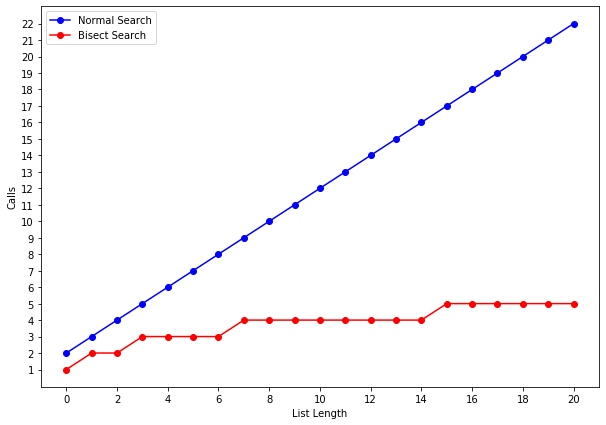

In [78]:
plt.figure(figsize=(10, 7))

values, calls = zip(*sorted(ns_counts.items()))
values2, calls2 = zip(*sorted(bs_counts.items()))

plt.plot(values, calls,'b-o',values2,calls2,'r-o')
plt.legend(['Normal Search','Bisect Search'])
plt.xlabel('List Length')
plt.ylabel('Calls')
plt.xticks(list(range(0,test_num+1,2)))
plt.yticks(list(range(1,test_num+3,1)))

plt.show()